# Plotly Express

Check the presentation blog post [Introducing Plotly Express](https://medium.com/@plotlygraphs/introducing-plotly-express-808df010143d).

In [1]:
# Plotly Express is now a sublibrary of Plotly:
import plotly.express as px

## Tidy DataFrames as input in Plotly Express

Tidy Data according to Hadley Wickham: ([original paper](http://vita.had.co.nz/papers/tidy-data.pdf))

- Each variable forms a column and contains values
- Each observation forms a row
- Each type of observational unit forms a table

In [2]:
import pandas as pd

In [3]:
# Here is a "messy" dataframe (wide-form):
messy = pd.DataFrame({
    'patient': ['John Smith', 'Jane Doe', 'Mary Johnson'],
    'Treatment A': [None, 16, 3],
    'Treatment B': [2, 11, 1],
})

messy

,patient,Treatment A,Treatment B
0,John Smith,NaN,2
1,Jane Doe,16.0,11
2,Mary Johnson,3.0,1


In [4]:
# The pandas method `.melt` can often be used to tidy the data (long-form):
tidy = messy.melt(
    id_vars=['patient'],
    value_vars=['Treatment A', 'Treatment B'],
    var_name='Treatment',
    value_name='Result',
)

tidy

,patient,Treatment,Result
0,John Smith,Treatment A,NaN
1,Jane Doe,Treatment A,16.0
2,Mary Johnson,Treatment A,3.0
3,John Smith,Treatment B,2.0
4,Jane Doe,Treatment B,11.0
5,Mary Johnson,Treatment B,1.0


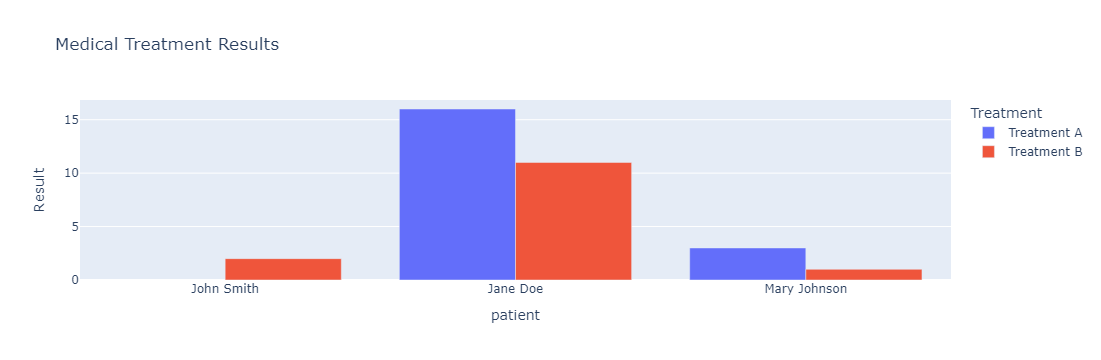

In [9]:
# Once it is in tidy format, plotly express allows you to build complex interactive plots with a one-liner:
px.bar(
    data_frame=tidy,
    x='patient',
    y='Result',
    color='Treatment',
    barmode='group',
    title='Medical Treatment Results',
)

**IMPORTANT**: From Plotly.py version 4.8 it is no longer a requirement to use [tidy](https://www.jeannicholashould.com/tidy-data-in-python.html) dataframes. See [this post](https://medium.com/plotly/beyond-tidy-plotly-express-now-accepts-wide-form-and-mixed-form-data-bdc3e054f891).

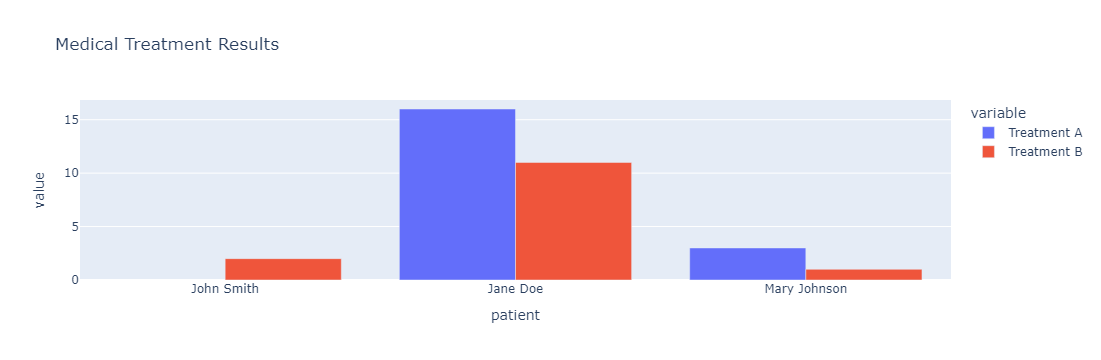

In [10]:
# Plotly express also takes messy dataframes (suitable for quick visualizations during data exploration).
px.bar(
    messy, 
    x='patient', 
    y=['Treatment A', 'Treatment B'], 
    barmode='group',
    title='Medical Treatment Results',
)

## Exercise 1

Use the example cluster data, loaded with:

In [11]:
import pandas as pd
table = pd.read_csv('https://raw.githubusercontent.com/chumo/Data2Serve/master/transition_clusters.csv')

In [46]:
table.tail()


,Xi,Yi,Xf,Yf,color
85,403.214222,414.818250,298.802341,149.868698,blue
86,167.749557,477.133022,322.576822,108.178118,blue
87,333.530787,460.164110,293.644438,130.646623,blue
88,415.198772,210.747791,304.092241,91.984033,blue
89,24.273453,290.319868,320.828650,119.716195,blue


In [41]:
new = pd.DataFrame(columns=['x', 'y', 'color', 'status'])

tide = pd.concat([table, new])

In [45]:
tide

,Xi,Yi,Xf,Yf,color,x,y,status
0,109.360643,434.557514,90.755847,171.363051,red,NaN,NaN,NaN
1,55.957358,438.934136,84.189607,182.890903,red,NaN,NaN,NaN
2,369.115969,419.904538,112.121845,144.288556,red,NaN,NaN,NaN
3,491.392739,492.316412,116.747266,170.049756,red,NaN,NaN,NaN
4,34.286602,404.017801,97.938407,181.777689,red,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
85,403.214222,414.818250,298.802341,149.868698,blue,NaN,NaN,NaN
86,167.749557,477.133022,322.576822,108.178118,blue,NaN,NaN,NaN
87,333.530787,460.164110,293.644438,130.646623,blue,NaN,NaN,NaN
88,415.198772,210.747791,304.092241,91.984033,blue,NaN,NaN,NaN


In [49]:
tide.loc[0]['Xi']

np.float64(109.36064277774466)

In [ ]:
for i, item in tide.iterrows():
    print(item['Xi'])

In [57]:
### exercise 1
result = pd.concat([
    table[['Xi','Yi','color']].assign(status='initial').rename(columns={'Xi':'x', 'Yi':'y'}),
    table[['Xf','Yf','color']].assign(status='final').rename(columns={'Xf':'x', 'Yf':'y'}),
])

In [97]:
result.head()

,x,y,color,status
0,109.360643,434.557514,red,initial
1,55.957358,438.934136,red,initial
2,369.115969,419.904538,red,initial
3,491.392739,492.316412,red,initial
4,34.286602,404.017801,red,initial


... and convert it into a tidy dataframe (_HINT_: use `pd.concat` method). It should look like this:

![](images/fig_05.0.png)

In [93]:
print(result['color'].unique())  # Check unique color names in the column
print(result['color'].dtype) 

['red' 'green' 'blue']
object


In [92]:
result['color'] = result['color'].astype(str)

In [88]:
result['color'] = result['color'].str.strip().str.lower() 

Take the tidy dataframe created in Exercise 1 and build this plot with two subplots:

![](images/fig_05.1.png)

Check the docs:

- [plotly express scatter](https://plotly.com/python-api-reference/generated/plotly.express.scatter)
  - range_x
  - range_y
  - facet_row
  - labels
  - color
  - color_discrete_map
  - facet_row_spacing
  
After the figure has been created, you can hide the legend with:

`.update_layout(showlegend=False)`

In [132]:
color_map = {
    'blue': 'blue',
    'green': 'green',
    'red': 'red'
}

div = (px.scatter(
    data_frame=result,
    x='x',
    y='y',
    color='color',
    color_discrete_map='identity',
    title='Blubby',
    width=600, 
    height=600,
    animation_frame ='status',
).update_layout(showlegend=True)
      )


In [115]:
div.write_html(
    file='animation.html', 
    include_plotlyjs=False,
    config=dict(displaylogo=False),
    full_html=False,
)

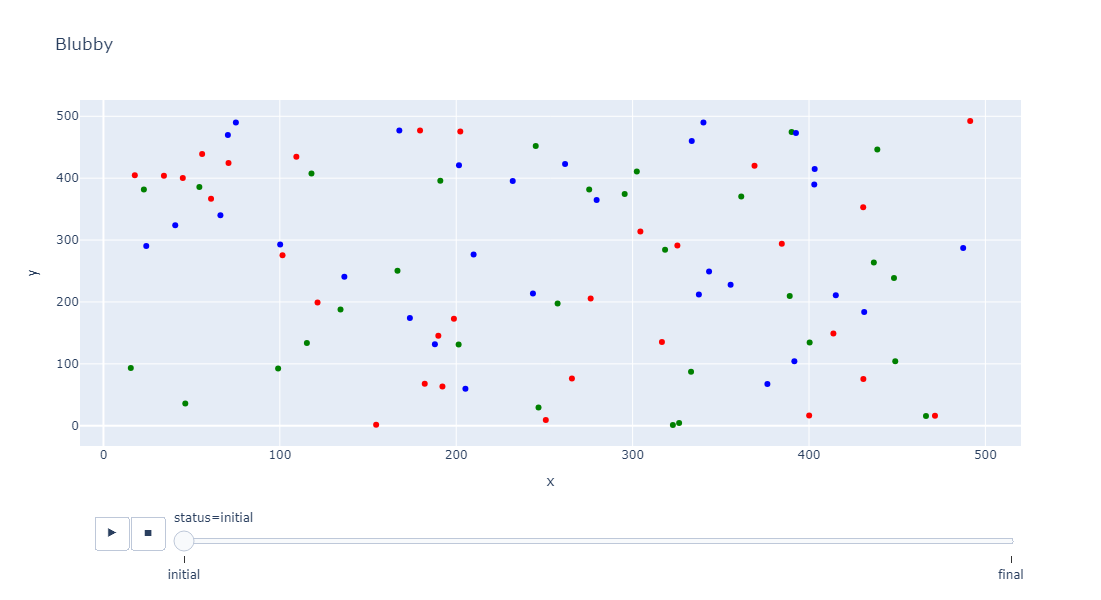

In [133]:
div

And now try to make each subplot as a frame of an animated plot:

![](images/fig_05.2.png)

Check the docs:

- [plotly express scatter](https://plotly.com/python-api-reference/generated/plotly.express.scatter)
  - animation_frame
  - category_orders

## Exercise 3

Using the gapminder data:

In [123]:
gapminder = px.data.gapminder()

In [124]:
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [158]:
chart = px.choropleth(
    data_frame=gapminder,
    locationmode='country names',
    locations='country',
    color='gdpPercap',
    title='GdpPerCapita in each Country',
    width=1100, 
    height=800,
    animation_frame ='year',
).update_layout(showlegend=False)
      

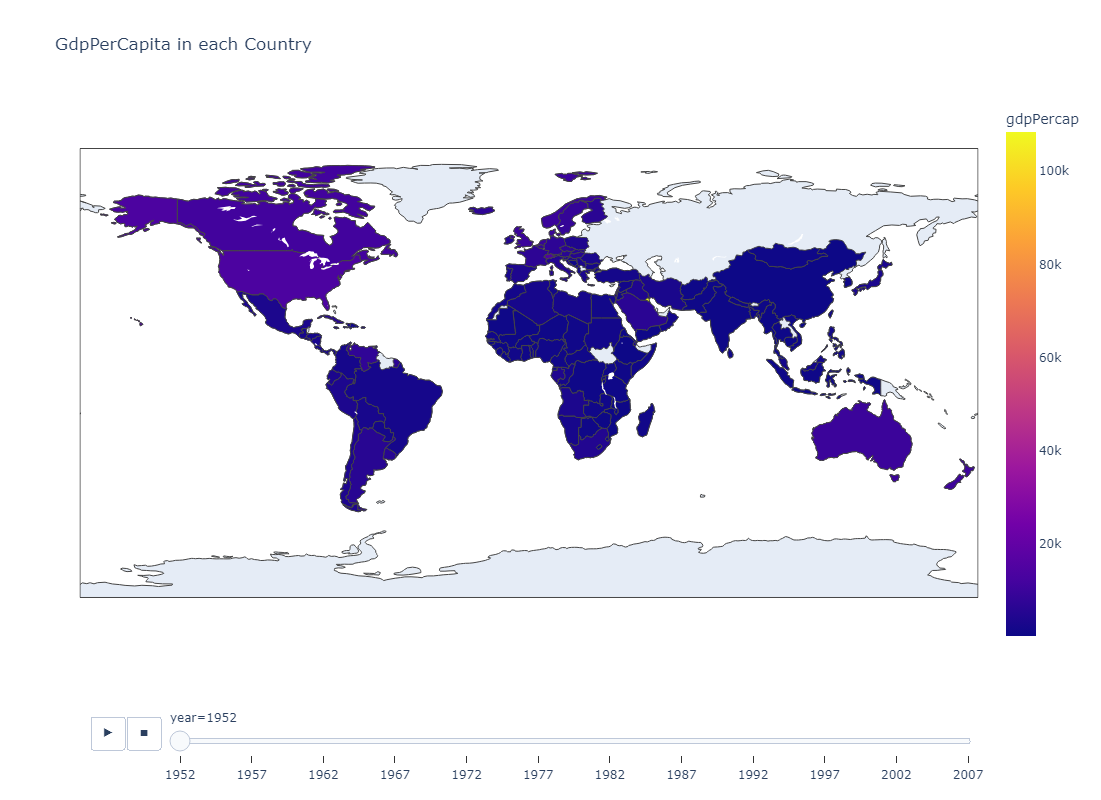

In [159]:
chart

Build the following plot:

![](images/fig_05.3.png)

Check the docs:

- [plotly express choropleth](http://plotly.com/python-api-reference/generated/plotly.express.choropleth)
  - locations

And now the following plot:

![](images/fig_05.4.png)

Check the docs:

- [plotly express box](https://plotly.com/python-api-reference/generated/plotly.express.box.html)
  - points

In [195]:
year = px.box(
    gapminder[gapminder['year'] == 1977],
    x='continent',
    y='gdpPercap',
    width=1100, 
    height=800,
    range_y=[0, 64000],
    points= False,
).update_layout(showlegend=False)
#year.update_yaxes(range=[0, 500])


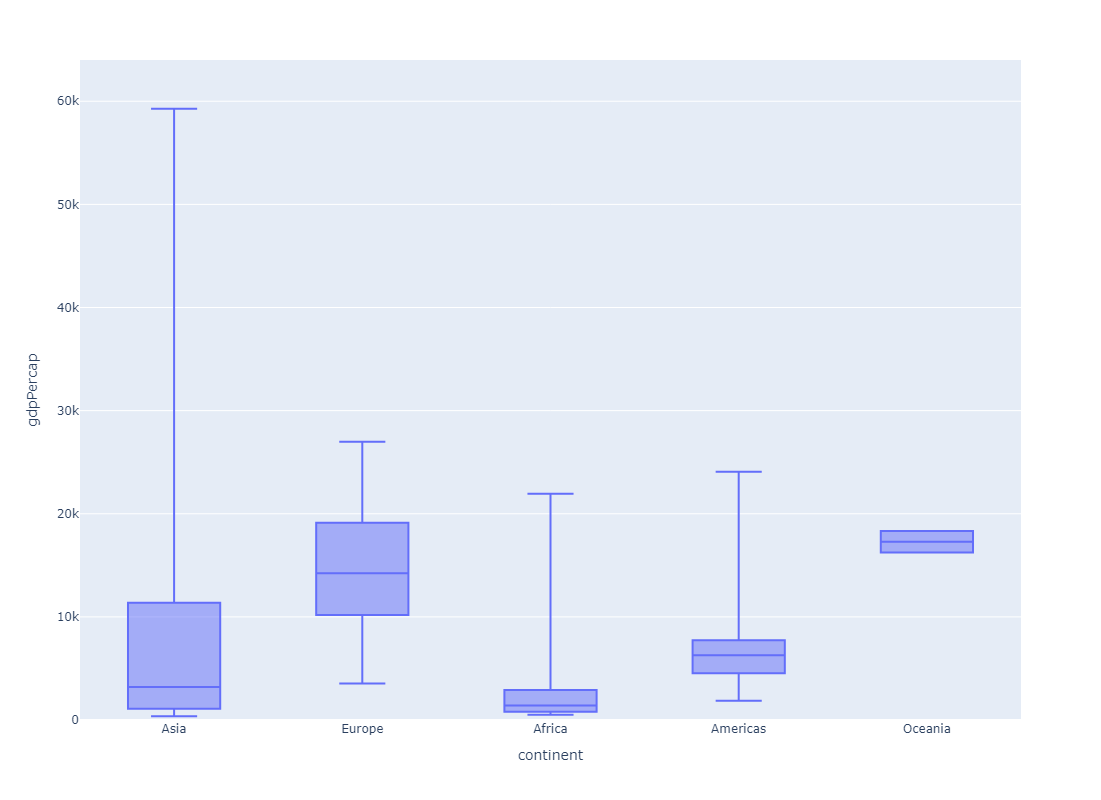

In [196]:
year

## Plotly Express powered backend for Pandas plotting

Since Pandas 0.25 it is possible to provide any backend for the `.plot` plotting API. 

Plotly backend ([see here](https://plotly.com/python/pandas-backend/)) can be set with:

In [186]:
import pandas as pd
pd.options.plotting.backend = 'plotly'

Then you can use the most common functionalities of Plotly Express by passing your Plotly parameters to the `.plot` method available to any pandas DataFrame;

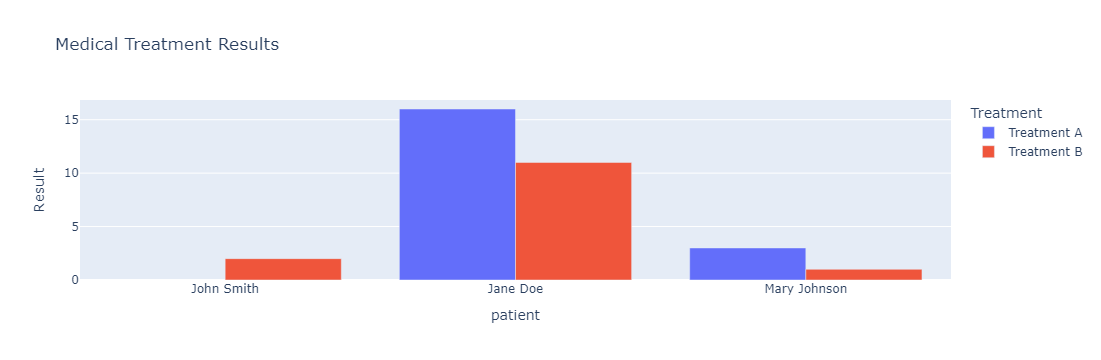

In [187]:
tidy.plot.bar(
    x='patient', 
    y='Result', 
    color='Treatment',
    barmode='group',
    title='Medical Treatment Results',
)